In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
sublist=['ec105', 'ec106', 'ec107', 'ec108']
# sublist=['ec108']
phase='study'
all=pd.DataFrame()
for sub in sublist:
    file='data/' + sub + phase + 'eyebehave.csv'
    print(file)
    eye=pd.read_csv(file, index_col=0)
    all=pd.concat([all,eye])
all.columns

data/ec105studyeyebehave.csv
data/ec106studyeyebehave.csv
data/ec107studyeyebehave.csv
data/ec108studyeyebehave.csv


Index(['block', 'cond', 'duration', 'end', 'endloc', 'event', 'loc1end',
       'loc1start', 'loc1x', 'loc1y', 'loc2end', 'loc2start', 'loc2x', 'loc2y',
       'loc3end', 'loc3start', 'loc3x', 'loc3y', 'objonset', 'recog loc',
       'recog order', 'refresh order', 'same/diff', 'start', 'startloc',
       'study order', 'sub', 'trialend', 'trialnum', 'xend', 'xstart', 'yend',
       'ystart'],
      dtype='object')

In [3]:
roimask=all['startloc']=='offscreen'
all_roi=all[~roimask]
fix=all_roi[all_roi['event']=='EFIX']
fix=fix[fix['duration']>80]
fix=fix[fix['recog loc']>0]
fix.columns

Index(['block', 'cond', 'duration', 'end', 'endloc', 'event', 'loc1end',
       'loc1start', 'loc1x', 'loc1y', 'loc2end', 'loc2start', 'loc2x', 'loc2y',
       'loc3end', 'loc3start', 'loc3x', 'loc3y', 'objonset', 'recog loc',
       'recog order', 'refresh order', 'same/diff', 'start', 'startloc',
       'study order', 'sub', 'trialend', 'trialnum', 'xend', 'xstart', 'yend',
       'ystart'],
      dtype='object')

In [4]:
rois=['loc1start', 'loc2start', 'loc3start', 'screen']
roi_prop_dict={}
roi_prop_list=[]
for row, ldf in fix.groupby(['sub', 'trialnum', 'cond', 'recog loc']):
    roi_sum = ldf['duration'].sum()
    for roi in rois:
        loc_ldf = ldf[ldf['startloc']==roi]
        loc_dur = loc_ldf['duration'].sum()
        loc_prop = loc_dur/roi_sum
        roi_prop_dict = {'sub':ldf['sub'].iloc[0], 'cond':ldf['cond'].iloc[0], 'trial':ldf['trialnum'].iloc[0], 
                         'recog loc':ldf['recog loc'].iloc[0],
                         'all_roi_sum':roi_sum, 'roi':roi, 'roi_sum':loc_dur, 'roi_prop':loc_prop}
        roi_prop_list.append(roi_prop_dict)
roi_prop_df=pd.DataFrame(roi_prop_list)

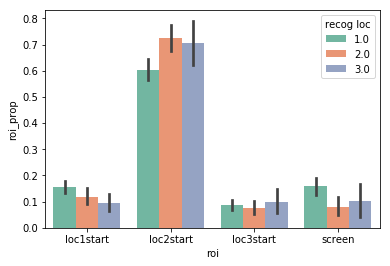

In [96]:
sns.barplot(x='roi', y='roi_prop', data=roi_prop_df[roi_prop_df['cond']==1], hue='recog loc', palette='Set2')

165    1.0
166    1.0
167    1.0
168    1.0
169    1.0
170    1.0
171    1.0
172    1.0
173    1.0
174    1.0
Name: cond, dtype: float64


(0, 1080)

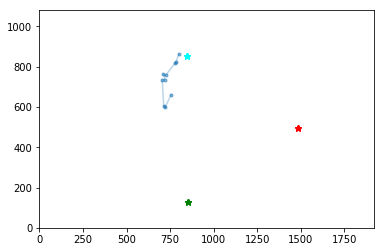

In [16]:
sub='ec108'
subdf=all[(all['sub']==sub) & (all['refresh order']==30) ]
print(subdf['cond'])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(subdf.xstart, subdf.ystart, marker='.', alpha=0.3)
ax.plot(subdf.xstart, subdf.ystart, marker='.', alpha=0.3)
ax.scatter(subdf.loc1x, subdf.loc1y, marker='*', c='cyan')
ax.scatter(subdf.loc2x, subdf.loc2y, marker='*', c='red')
ax.scatter(subdf.loc3x, subdf.loc3y, marker='*', c='green')
plt.xlim(0, 1920)
plt.ylim(0, 1080)
# plt.savefig('figs/eye_path_ec108_tr30_recog.eps', format='eps', dpi=1000)

In [12]:
sublist=['ec105', 'ec106', 'ec107', 'ec108']
# sublist=['ec108']

all_behave=pd.DataFrame()
for sub in sublist:
    file='data/' + sub + 'behave.csv'
    print(file)
    behave=pd.read_csv(file, index_col=0)
    all_behave=pd.concat([all_behave,behave])
all_behave.columns

data/ec105behave.csv
data/ec106behave.csv
data/ec107behave.csv
data/ec108behave.csv


Index(['loc1x', 'loc1y', 'block', 'angle', 'loc3x', 'loc3y', 'loc2x', 'loc2y',
       'loc1-loc2dist', 'loc1-loc3dist', 'loc2-loc3dist', 'picid', 'contextid',
       'cond', 'study order.1', 'refresh order', 'recog order', 'same/diff',
       'same/diff rt', 'recog button', 'recog loc', 'recog rt'],
      dtype='object')

In [15]:
all['count']=1
all=all[all['recog loc']!=-1]

In [98]:
locs=['1', '2', '3']
recog_prop_dict={}
recog_prop_list=[]
for row, ldf in all.groupby(['sub', 'trialnum', 'cond', 'recog loc']):
    print('row:',row)
    print('ldf:',ldf)
#     for roi in rois:
#         loc_ldf = ldf[ldf['startloc']==roi]
#         loc_dur = loc_ldf['duration'].sum()
#         loc_prop = loc_dur/roi_sum
#         roi_prop_dict = {'sub':ldf['sub'].iloc[0], 'cond':ldf['cond'].iloc[0], 'trial':ldf['trialnum'].iloc[0], 
#                          'recog loc':ldf['recog loc'].iloc[0],
#                          'all_roi_sum':roi_sum, 'roi':roi, 'roi_sum':loc_dur, 'roi_prop':loc_prop}
#         roi_prop_list.append(roi_prop_dict)
# roi_prop_df=pd.DataFrame(roi_prop_list)


# recog_num=pd.DataFrame(all.groupby(['sub', 'block', 'trialnum', 'cond', 'recog loc',])['count'].sum())
# recog_num.reset_index(inplace=True)
# recog_num['count']=1

# recog_num=pd.DataFrame(recog_num.groupby(['sub', 'cond', 'recog loc',])['count'].sum()/64)
# recog_mean=pd.DataFrame(recog_num.to_records())

# recog_mean

row: ('ec105', 1, 1.0, 1.0)
ldf:     block  cond  duration       end     endloc  event      loc1end  \
0       1   1.0        36  1421.844        NaN   EFIX          NaN   
1       1   1.0        30  1451.844  offscreen  ESACC  2166.379782   
2       1   1.0        32  1483.844        NaN  blink          NaN   
3       1   1.0      1094  2577.844     screen  ESACC   480.432482   
4       1   1.0       256  2833.844        NaN   EFIX          NaN   
5       1   1.0        48  2881.844     screen  ESACC   681.760552   
6       1   1.0       212  3093.844        NaN   EFIX          NaN   
7       1   1.0       708  3801.844     screen  ESACC   664.685068   
8       1   1.0       128  3929.844        NaN   EFIX          NaN   
9       1   1.0        26  3955.844     screen  ESACC   864.278659   
10      1   1.0       136  4091.844        NaN   EFIX          NaN   
11      1   1.0        38  4129.844     screen  ESACC   910.910457   
12      1   1.0       132  4261.844        NaN   EFIX    

ldf:      block  cond  duration       end   endloc  event     loc1end   loc1start  \
122      1   1.0        38   282.622  loc1end  ESACC   33.300000  360.136002   
123      1   1.0        42   324.622      NaN   EFIX         NaN   63.763077   
124      1   1.0        38   362.622  loc1end  ESACC   45.393061   55.879334   
125      1   1.0        24   386.622      NaN   EFIX         NaN   47.624888   
126      1   1.0        42   428.622  loc2end  ESACC  520.071687   75.677870   
127      1   1.0      1918  2346.622      NaN   EFIX         NaN  559.693952   
128      1   1.0        40  2386.622   screen  ESACC  189.994632  556.763729   
129      1   1.0      1068  3454.622      NaN   EFIX         NaN  124.029432   
130      1   1.0        56  3510.622  loc3end  ESACC  595.763208  154.454006   
131      1   1.0        92  3602.622      NaN   EFIX         NaN  585.967644   
132      1   1.0        14  3616.622  loc3end  ESACC  517.769650  563.047511   
133      1   1.0       648  4264.62

ldf:      block  cond  duration      end   endloc  event     loc1end   loc1start  \
272      2   2.0        64   341.01   screen  ESACC  253.531162  463.299514   
273      2   2.0       132   473.01      NaN   EFIX         NaN  208.634441   
274      2   2.0        34   507.01  loc1end  ESACC   61.204575  181.119877   
275      2   2.0        74   581.01      NaN   EFIX         NaN   36.431305   
276      2   2.0        52   633.01  loc1end  ESACC   52.460461   38.430327   
277      2   2.0        94   727.01      NaN   EFIX         NaN   44.615356   
278      2   2.0       170   897.01   screen  ESACC  228.192375   48.130032   
279      2   2.0        28   925.01      NaN   EFIX         NaN  235.132686   
280      2   2.0        24   949.01   screen  ESACC  237.168843  231.455611   
281      2   2.0       358  1307.01      NaN   EFIX         NaN  248.541606   
282      2   2.0        24  1331.01  loc1end  ESACC   72.355304  269.836043   
283      2   2.0        26  1357.01      NaN   

ldf:      block  cond  duration       end   endloc  event     loc1end   loc1start  \
549      2   2.0        22   252.913  loc1end  ESACC   43.326897  182.918780   
550      2   2.0       424   676.913      NaN   EFIX         NaN   44.029649   
551      2   2.0        26   702.913  loc1end  ESACC   51.457264   56.828514   
552      2   2.0       148   850.913      NaN   EFIX         NaN   61.823377   
553      2   2.0        42   892.913  loc1end  ESACC   57.660125   88.519941   
554      2   2.0        90   982.913      NaN   EFIX         NaN   61.560539   
555      2   2.0        54  1036.913  loc1end  ESACC   89.899333   60.524788   
556      2   2.0       146  1182.913      NaN   EFIX         NaN   64.305599   
557      2   2.0        26  1208.913  loc1end  ESACC   55.806272   66.115656   
558      2   2.0        94  1302.913      NaN   EFIX         NaN   61.676981   
559      2   2.0        30  1332.913  loc2end  ESACC  218.345231   81.609129   
560      2   2.0       142  1474.91

ldf:      block  cond  duration       end     endloc  event      loc1end  \
677      3   2.0        20   238.635    loc1end  ESACC    18.166177   
678      3   2.0      2630  2868.635        NaN   EFIX          NaN   
679      3   2.0        36  2904.635  offscreen  ESACC  1308.407983   
680      3   2.0       208  3112.635        NaN   EFIX          NaN   
681      3   2.0       110  3222.635  offscreen  ESACC  1880.710983   
682      3   2.0       134  3356.635        NaN   EFIX          NaN   
683      3   2.0        44  3400.635  offscreen  ESACC  1871.778887   
684      3   2.0        36  3436.635        NaN   EFIX          NaN   
685      3   2.0        36  3472.635  offscreen  ESACC  1771.276833   
686      3   2.0        26  3498.635        NaN   EFIX          NaN   
687      3   2.0        66  3564.635  offscreen  ESACC  2187.498343   
688      3   2.0        88  3652.635        NaN   EFIX          NaN   
689      3   2.0       114  3766.635    loc1end  ESACC    39.845953   
6

ldf:      block  cond  duration       end   endloc  event     loc1end   loc1start  \
817      4   2.0        24   273.107  loc2end  ESACC  581.841645  631.733844   
818      4   2.0       178   451.107      NaN   EFIX         NaN  544.522956   
819      4   2.0        46   497.107  loc1end  ESACC   62.505360  542.776602   
820      4   2.0       350   847.107      NaN   EFIX         NaN   79.446901   
821      4   2.0        14   861.107  loc1end  ESACC   16.994411   66.481652   
822      4   2.0       140  1001.107      NaN   EFIX         NaN   39.745692   
823      4   2.0        36  1037.107   screen  ESACC  350.243258   49.402530   
824      4   2.0       228  1265.107      NaN   EFIX         NaN  390.295093   
825      4   2.0        16  1281.107   screen  ESACC  398.466172  391.467764   
826      4   2.0        70  1351.107      NaN   EFIX         NaN  401.305196   
827      4   2.0        36  1387.107  loc2end  ESACC  560.365399  405.259485   
828      4   2.0       254  1641.10

ldf:       block  cond  duration       end     endloc  event      loc1end  \
1016      4   2.0        30   626.394        NaN   EFIX          NaN   
1017      4   2.0       134   760.394    loc1end  ESACC   109.670871   
1018      4   2.0        22   782.394        NaN   EFIX          NaN   
1019      4   2.0        54   836.394    loc1end  ESACC   102.064146   
1020      4   2.0        58   894.394        NaN   EFIX          NaN   
1021      4   2.0        58   952.394    loc1end  ESACC    93.557469   
1022      4   2.0        28   980.394        NaN   EFIX          NaN   
1023      4   2.0        24  1004.394    loc1end  ESACC   154.797448   
1024      4   2.0        26  1030.394        NaN   EFIX          NaN   
1025      4   2.0        76  1106.394    loc3end  ESACC   220.624749   
1026      4   2.0        68  1174.394        NaN   EFIX          NaN   
1027      4   2.0       338  1512.394    loc3end  ESACC   343.152342   
1028      4   2.0        42  1554.394        NaN   EFIX    

ldf:       block  cond  duration       end   endloc  event     loc1end   loc1start  \
1085      5   2.0        38   236.541  loc1end  ESACC   24.629454  369.529430   
1086      5   2.0      1542  1778.541      NaN   EFIX         NaN   15.572412   
1087      5   2.0        52  1830.541  loc3end  ESACC  483.895237   37.194086   
1088      5   2.0       340  2170.541      NaN   EFIX         NaN  496.969073   
1089      5   2.0       136  2306.541  loc1end  ESACC   34.075358  480.660650   
1090      5   2.0       348  2654.541      NaN   EFIX         NaN   34.373536   
1091      5   2.0       132  2786.541  loc1end  ESACC   92.907750   87.527653   
1092      5   2.0      2258  5044.541      NaN   EFIX         NaN   40.376354   

      loc1x  loc1y   ...       start   startloc  study order    sub  trialend  \
1085  683.0  298.0   ...     200.541  loc3start         70.0  ec105       NaN   
1086  683.0  298.0   ...     238.541  loc1start         70.0  ec105       NaN   
1087  683.0  298.0   .

ldf:       block  cond  duration       end   endloc  event     loc1end   loc1start  \
1213      6   2.0        14   265.184  loc2end  ESACC  417.871093  401.303040   
1214      6   2.0       118   383.184      NaN   EFIX         NaN  422.413305   
1215      6   2.0        44   427.184  loc1end  ESACC   51.631192  421.165075   
1216      6   2.0      3138  3565.184      NaN   EFIX         NaN   28.281619   
1217      6   2.0        30  3595.184  loc3end  ESACC  356.384988   50.596937   
1218      6   2.0        70  3665.184      NaN   EFIX         NaN  374.072947   
1219      6   2.0        16  3681.184  loc3end  ESACC  431.011659  372.690663   
1220      6   2.0       380  4061.184      NaN   EFIX         NaN  420.843308   
1221      6   2.0        44  4105.184  loc1end  ESACC   40.872118  407.814786   
1222      6   2.0       938  5043.184      NaN   EFIX         NaN   22.163483   

      loc1x  loc1y   ...       start   startloc  study order    sub  trialend  \
1213  580.0  677.0   .

ldf:       block  cond  duration      end   endloc  event     loc1end   loc1start  \
1319      6   2.0        44   312.44  loc2end  ESACC  503.563303  612.829544   
1320      6   2.0       122   434.44      NaN   EFIX         NaN  494.951816   
1321      6   2.0        48   482.44  loc1end  ESACC   62.427238  490.144724   
1322      6   2.0      4564  5046.44      NaN   EFIX         NaN   58.229288   

      loc1x  loc1y   ...     start   startloc  study order    sub  trialend  \
1319  404.0  796.0   ...    270.44     screen         94.0  ec105       NaN   
1320  404.0  796.0   ...    314.44  loc2start         94.0  ec105       NaN   
1321  404.0  796.0   ...    436.44  loc2start         94.0  ec105       NaN   
1322  404.0  796.0   ...    484.44  loc1start         94.0  ec105       NaN   

      trialnum   xend  xstart   yend  ystart  
1319        93  628.4   933.4  345.2   487.3  
1320        93    NaN   604.1    NaN   343.3  
1321        93  383.6   609.9  737.0   351.2  
1322      

ldf:       block  cond  duration       end   endloc  event     loc1end   loc1start  \
1405      7   1.0        42   251.425  loc2end  ESACC  429.350638  492.630947   
1406      7   1.0       986  1237.425      NaN   EFIX         NaN  453.585372   
1407      7   1.0        38  1275.425  loc1end  ESACC   48.941189  449.669223   
1408      7   1.0       168  1443.425      NaN   EFIX         NaN   41.182521   
1409      7   1.0        18  1461.425  loc1end  ESACC   80.180297   43.533206   
1410      7   1.0       310  1771.425      NaN   EFIX         NaN   95.954416   
1411      7   1.0        56  1827.425  loc3end  ESACC  416.027691   88.700507   
1412      7   1.0       364  2191.425      NaN   EFIX         NaN  455.621773   
1413      7   1.0        50  2241.425  loc1end  ESACC  120.247453  461.830900   
1414      7   1.0       368  2609.425      NaN   EFIX         NaN  104.947272   
1415      7   1.0        46  2655.425  loc2end  ESACC  427.043909   82.504121   
1416      7   1.0      

ldf:       block  cond  duration       end   endloc  event     loc1end   loc1start  \
1507      8   2.0        24   248.701  loc2end  ESACC  463.522955  513.975758   
1508      8   2.0        72   320.701      NaN   EFIX         NaN  460.758907   
1509      8   2.0        48   368.701  loc1end  ESACC   92.394426  458.509062   
1510      8   2.0      1650  2018.701      NaN   EFIX         NaN   88.380145   
1511      8   2.0       344  2362.701  loc1end  ESACC   45.239916   53.421812   
1512      8   2.0       856  3218.701      NaN   EFIX         NaN   60.336722   
1513      8   2.0       266  3484.701  loc1end  ESACC  158.181952   92.033961   
1514      8   2.0       260  3744.701      NaN   EFIX         NaN  134.618164   
1515      8   2.0        12  3756.701  loc1end  ESACC   83.455976  118.101397   
1516      8   2.0       936  4692.701      NaN   EFIX         NaN   65.568056   
1517      8   2.0       124  4816.701  loc1end  ESACC  129.191718   70.066040   
1518      8   2.0      

ldf:       block  cond  duration      end   endloc  event     loc1end   loc1start  \
1615      8   1.0        42   246.05  loc2end  ESACC  288.028089  738.534799   
1616      8   1.0       998  1244.05      NaN   EFIX         NaN  260.840277   
1617      8   1.0        24  1268.05  loc1end  ESACC  144.158940  241.712722   
1618      8   1.0       144  1412.05      NaN   EFIX         NaN  101.682693   
1619      8   1.0        22  1434.05  loc1end  ESACC   13.951702  100.121726   
1620      8   1.0       566  2000.05      NaN   EFIX         NaN   31.678384   
1621      8   1.0        18  2018.05  loc1end  ESACC  145.658299   44.969768   
1622      8   1.0       120  2138.05      NaN   EFIX         NaN  176.417913   
1623      8   1.0        16  2154.05  loc2end  ESACC  233.564766  180.181936   
1624      8   1.0      1940  4094.05      NaN   EFIX         NaN  251.061905   
1625      8   1.0        18  4112.05  loc2end  ESACC  245.551828  239.100000   
1626      8   1.0       196  4308.0

ldf:      block  cond  duration       end   endloc  event    loc1end   loc1start  \
99       1   2.0        24   289.889  loc1end  ESACC  27.465251  153.529313   
100      1   2.0      4756  5045.889      NaN   EFIX        NaN   15.504838   

      loc1x  loc1y   ...      start   startloc  study order    sub  trialend  \
99   1134.0  490.0   ...    267.889  loc1start          4.0  ec106       NaN   
100  1134.0  490.0   ...    291.889  loc1start          4.0  ec106       NaN   

     trialnum    xend  xstart   yend  ystart  
99          7  1115.5   988.5  510.3   539.0  
100         7     NaN  1149.4    NaN   491.8  

[2 rows x 33 columns]
row: ('ec106', 8, 2.0, 1.0)
ldf:      block  cond  duration       end     endloc  event     loc1end  \
101      1   2.0        36   261.029    loc1end  ESACC   31.579265   
102      1   2.0      2386  2647.029        NaN   EFIX         NaN   
103      1   2.0        50  2697.029  offscreen  ESACC  521.875407   
104      1   2.0       180  2877.029   

ldf:      block  cond  duration       end   endloc  event     loc1end   loc1start  \
248      2   2.0        38   251.746  loc1end  ESACC   56.307193  354.464244   
249      2   2.0       148   399.746      NaN   EFIX         NaN   46.349218   
250      2   2.0        20   419.746  loc1end  ESACC   44.378598   40.761869   
251      2   2.0       514   933.746      NaN   EFIX         NaN   54.823353   
252      2   2.0       230  1163.746  loc1end  ESACC   32.526912   59.503025   
253      2   2.0       406  1569.746      NaN   EFIX         NaN    9.542536   
254      2   2.0         6  1575.746  loc1end  ESACC   26.476593   19.984994   
255      2   2.0       298  1873.746      NaN   EFIX         NaN   36.715120   
256      2   2.0        10  1883.746  loc1end  ESACC   37.254262   38.759386   
257      2   2.0       178  2061.746      NaN   EFIX         NaN   38.730350   
258      2   2.0       182  2243.746  loc2end  ESACC  375.230343   39.654760   
259      2   2.0       136  2379.74

ldf:      block  cond  duration       end   endloc  event     loc1end   loc1start  \
381      2   1.0        30   100.256  loc1end  ESACC  124.127837  256.353272   
382      2   1.0       246   346.256      NaN   EFIX         NaN  109.259553   
383      2   1.0        56   402.256  loc2end  ESACC  477.202619  115.767007   
384      2   1.0       140   542.256      NaN   EFIX         NaN  484.503725   
385      2   1.0        18   560.256  loc2end  ESACC  560.252987  496.438566   
386      2   1.0      2022  2582.256      NaN   EFIX         NaN  569.885120   
387      2   1.0       134  2716.256  loc2end  ESACC  587.143475  558.815980   
388      2   1.0      2328  5044.256      NaN   EFIX         NaN  536.809277   

      loc1x  loc1y   ...       start   startloc  study order    sub  trialend  \
381  1011.0  453.0   ...      72.256     screen         28.0  ec106       NaN   
382  1011.0  453.0   ...     102.256  loc1start         28.0  ec106       NaN   
383  1011.0  453.0   ...     34

ldf:      block  cond  duration       end   endloc  event     loc1end   loc1start  \
495      3   2.0        34   156.157   screen  ESACC  331.483031  511.905743   
496      3   2.0       134   290.157      NaN   EFIX         NaN  300.319330   
497      3   2.0        38   328.157  loc1end  ESACC   25.242028  303.900066   
498      3   2.0       266   594.157      NaN   EFIX         NaN   25.609569   
499      3   2.0         8   602.157  loc1end  ESACC   44.059619   35.782118   
500      3   2.0       444  1046.157      NaN   EFIX         NaN   42.566771   
501      3   2.0       162  1208.157  loc1end  ESACC   73.417300   31.984528   
502      3   2.0       978  2186.157      NaN   EFIX         NaN   32.432237   
503      3   2.0         8  2194.157  loc1end  ESACC   54.385384   40.757821   
504      3   2.0      1114  3308.157      NaN   EFIX         NaN   64.052557   
505      3   2.0         8  3316.157  loc1end  ESACC   36.923841   51.092955   
506      3   2.0       794  4110.15

[22 rows x 33 columns]
row: ('ec106', 46, 2.0, 1.0)
ldf:      block  cond  duration      end   endloc  event     loc1end   loc1start  \
666      3   2.0        44   251.32  loc1end  ESACC   41.617304  428.107895   
667      3   2.0       786  1037.32      NaN   EFIX         NaN   19.204166   
668      3   2.0       146  1183.32  loc1end  ESACC   43.133514   26.241380   
669      3   2.0       216  1399.32      NaN   EFIX         NaN   17.304624   
670      3   2.0        42  1441.32  loc3end  ESACC  321.193929   10.510947   
671      3   2.0       406  1847.32      NaN   EFIX         NaN  329.228447   
672      3   2.0        38  1885.32  loc1end  ESACC   71.841840  338.684115   
673      3   2.0       166  2051.32      NaN   EFIX         NaN   48.692505   
674      3   2.0        16  2067.32  loc1end  ESACC   22.549945   40.834422   
675      3   2.0      1122  3189.32      NaN   EFIX         NaN   10.290287   
676      3   2.0       144  3333.32  loc1end  ESACC   38.897301   41.55406

ldf:      block  cond  duration      end   endloc  event     loc1end   loc1start  \
757      4   2.0        32   246.11  loc1end  ESACC   48.049246  304.969654   
758      4   2.0      1182  1428.11      NaN   EFIX         NaN   14.276204   
759      4   2.0        22  1450.11  loc1end  ESACC  109.305444   23.084627   
760      4   2.0       248  1698.11      NaN   EFIX         NaN  163.241692   
761      4   2.0        22  1720.11   screen  ESACC  275.619339  171.746587   
762      4   2.0       672  2392.11      NaN   EFIX         NaN  319.819590   
763      4   2.0        66  2458.11  loc1end  ESACC  126.856218  275.615765   
764      4   2.0       634  3092.11      NaN   EFIX         NaN   68.737908   
765      4   2.0        16  3108.11  loc1end  ESACC   17.464249   64.568878   
766      4   2.0       598  3706.11      NaN   EFIX         NaN   11.417968   
767      4   2.0         8  3714.11  loc1end  ESACC   36.492876   23.532106   
768      4   2.0       296  4010.11      NaN   

ldf:      block  cond  duration       end     endloc  event     loc1end  \
872      4   2.0        62   490.581    loc1end  ESACC   13.224598   
873      4   2.0       266   756.581        NaN   EFIX         NaN   
874      4   2.0         8   764.581    loc1end  ESACC   17.089178   
875      4   2.0       660  1424.581        NaN   EFIX         NaN   
876      4   2.0       196  1620.581     screen  ESACC  264.557461   
877      4   2.0       130  1750.581        NaN   EFIX         NaN   
878      4   2.0        48  1798.581    loc2end  ESACC  617.407888   
879      4   2.0       220  2018.581        NaN   EFIX         NaN   
880      4   2.0        16  2034.581    loc2end  ESACC  696.233481   
881      4   2.0       196  2230.581        NaN   EFIX         NaN   
882      4   2.0        10  2240.581    loc2end  ESACC  673.998249   
883      4   2.0       190  2430.581        NaN   EFIX         NaN   
884      4   2.0        62  2492.581    loc1end  ESACC    2.563201   
885      4   2.

ldf:       block  cond  duration       end   endloc  event     loc1end   loc1start  \
1047      5   1.0        10   310.256  loc2end  ESACC  401.619546  410.724482   
1048      5   1.0      1750  2060.256      NaN   EFIX         NaN  411.078983   
1049      5   1.0       138  2198.256  loc2end  ESACC  395.869499  401.651603   
1050      5   1.0       310  2508.256      NaN   EFIX         NaN  384.809212   
1051      5   1.0        36  2544.256  loc1end  ESACC  137.693645  382.302877   
1052      5   1.0       182  2726.256      NaN   EFIX         NaN  120.446378   
1053      5   1.0        20  2746.256  loc1end  ESACC   33.702819  114.932067   
1054      5   1.0       150  2896.256      NaN   EFIX         NaN   42.104632   
1055      5   1.0        46  2942.256  loc2end  ESACC  411.528043   45.502747   
1056      5   1.0      2102  5044.256      NaN   EFIX         NaN  433.704508   

      loc1x  loc1y   ...       start   startloc  study order    sub  trialend  \
1047  565.0  635.0   .

ldf:       block  cond  duration       end   endloc  event     loc1end   loc1start  \
1171      5   1.0        20   120.074   screen  ESACC  717.183045  638.680773   
1172      5   1.0       112   232.074      NaN   EFIX         NaN  737.415575   
1173      5   1.0        38   270.074  loc2end  ESACC  571.848809  733.398282   
1174      5   1.0       810  1080.074      NaN   EFIX         NaN  552.171296   
1175      5   1.0       126  1206.074  loc2end  ESACC  571.565884  559.999804   
1176      5   1.0       352  1558.074      NaN   EFIX         NaN  555.495689   
1177      5   1.0        26  1584.074   screen  ESACC  708.246299  559.811986   
1178      5   1.0       342  1926.074      NaN   EFIX         NaN  743.901190   
1179      5   1.0        24  1950.074   screen  ESACC  841.815395  739.567881   
1180      5   1.0       318  2268.074      NaN   EFIX         NaN  863.790119   
1181      5   1.0        36  2304.074  loc2end  ESACC  583.392021  857.048715   
1182      5   1.0      

row: ('ec106', 86, 2.0, 1.0)
ldf:       block  cond  duration       end   endloc  event     loc1end   loc1start  \
1289      6   2.0        20    21.245  loc2end  ESACC  250.514052  303.896364   
1290      6   2.0       248   269.245      NaN   EFIX         NaN  251.802403   
1291      6   2.0        30   299.245  loc1end  ESACC   47.312578  252.576206   
1292      6   2.0       768  1067.245      NaN   EFIX         NaN   29.274562   
1293      6   2.0       134  1201.245  loc1end  ESACC   26.493962   54.193727   
1294      6   2.0      1268  2469.245      NaN   EFIX         NaN   31.289934   
1295      6   2.0        32  2501.245  loc2end  ESACC  224.605076   35.638462   
1296      6   2.0       512  3013.245      NaN   EFIX         NaN  272.441774   
1297      6   2.0        14  3027.245  loc2end  ESACC  317.735047  277.039799   
1298      6   2.0       834  3861.245      NaN   EFIX         NaN  330.631774   
1299      6   2.0        24  3885.245  loc2end  ESACC  202.778229  322.5195

ldf:       block  cond  duration      end   endloc  event     loc1end   loc1start  \
1434      6   1.0        28   264.21  loc2end  ESACC  546.703292  713.738453   
1435      6   1.0      4776  5040.21      NaN   EFIX         NaN  505.909725   

       loc1x  loc1y   ...     start   startloc  study order    sub  trialend  \
1434  1568.0  691.0   ...    238.21     screen         95.0  ec106       NaN   
1435  1568.0  691.0   ...    266.21  loc2start         95.0  ec106       NaN   

      trialnum    xend  xstart   yend  ystart  
1434        96  1024.0   870.7  636.7   538.7  
1435        96     NaN  1062.4    NaN   673.3  

[2 rows x 33 columns]
row: ('ec106', 97, 1.0, 2.0)
ldf:       block  cond  duration       end   endloc  event     loc1end   loc1start  \
1436      7   1.0        20   267.261  loc2end  ESACC  421.365886  302.779540   
1437      7   1.0       878  1145.261      NaN   EFIX         NaN  435.383015   
1438      7   1.0       178  1323.261  loc2end  ESACC  457.177307  43

ldf:       block  cond  duration       end   endloc  event     loc1end   loc1start  \
1609      7   1.0        26   236.811  loc2end  ESACC  419.513492  572.240553   
1610      7   1.0      1068  1304.811      NaN   EFIX         NaN  379.496772   
1611      7   1.0       198  1502.811  loc2end  ESACC  408.763514  397.606149   
1612      7   1.0       334  1836.811      NaN   EFIX         NaN  383.399596   
1613      7   1.0        26  1862.811  loc2end  ESACC  358.274113  373.297763   
1614      7   1.0       134  1996.811      NaN   EFIX         NaN  354.779890   
1615      7   1.0        42  2038.811  loc1end  ESACC   18.672440  349.970656   
1616      7   1.0       226  2264.811      NaN   EFIX         NaN    5.714018   
1617      7   1.0        44  2308.811  loc3end  ESACC  394.294332    4.742362   
1618      7   1.0       754  3062.811      NaN   EFIX         NaN  410.345476   
1619      7   1.0        40  3102.811  loc2end  ESACC  337.513407  404.620872   
1620      7   1.0      

ldf:       block  cond  duration       end   endloc  event     loc1end   loc1start  \
1765      8   1.0        26   270.774  loc2end  ESACC  333.406074  323.005526   
1766      8   1.0       152   422.774      NaN   EFIX         NaN  356.203102   
1767      8   1.0        14   436.774  loc2end  ESACC  396.922776  368.544163   
1768      8   1.0       592  1028.774      NaN   EFIX         NaN  401.657566   
1769      8   1.0        46  1074.774  loc3end  ESACC  387.470012  397.149254   
1770      8   1.0       252  1326.774      NaN   EFIX         NaN  389.288132   
1771      8   1.0       174  1500.774  loc2end  ESACC  319.460952  377.617929   
1772      8   1.0       554  2054.774      NaN   EFIX         NaN  350.587650   
1773      8   1.0        40  2094.774  loc1end  ESACC  119.407872  348.545908   
1774      8   1.0       530  2624.774      NaN   EFIX         NaN  110.828200   
1775      8   1.0        40  2664.774  loc3end  ESACC  343.792030  107.623139   
1776      8   1.0      

ldf:     block  cond  duration     end   endloc  event     loc1end   loc1start  \
0       1   1.0        62   335.0  loc2end  ESACC  581.259598   54.212176   
1       1   1.0       286   621.0      NaN   EFIX         NaN  622.031904   
2       1   1.0        14   635.0  loc2end  ESACC  663.542169  629.261869   
3       1   1.0       954  1589.0      NaN   EFIX         NaN  649.607451   
4       1   1.0        22  1611.0  loc2end  ESACC  569.404118  645.941460   
5       1   1.0       272  1883.0      NaN   EFIX         NaN  588.010519   
6       1   1.0        22  1905.0  loc2end  ESACC  679.348659  600.164019   
7       1   1.0      1346  3251.0      NaN   EFIX         NaN  644.748943   
8       1   1.0        40  3291.0   screen  ESACC  285.968058  628.631283   
9       1   1.0       550  3841.0      NaN   EFIX         NaN  283.454282   
10      1   1.0        34  3875.0  loc2end  ESACC  524.083524  280.038033   
11      1   1.0       370  4245.0      NaN   EFIX         NaN  509.2613

ldf:      block  cond  duration     end   endloc  event     loc1end   loc1start  \
138      1   1.0        26   252.0  loc2end  ESACC  637.695954  771.017847   
139      1   1.0       616   868.0      NaN   EFIX         NaN  631.649301   
140      1   1.0       196  1064.0  loc2end  ESACC  637.809392  634.981890   
141      1   1.0       504  1568.0      NaN   EFIX         NaN  631.926713   
142      1   1.0        24  1592.0  loc2end  ESACC  510.162376  627.551831   
143      1   1.0       258  1850.0      NaN   EFIX         NaN  491.260684   
144      1   1.0        44  1894.0  loc1end  ESACC  178.724509  486.056797   
145      1   1.0       164  2058.0      NaN   EFIX         NaN  133.634763   
146      1   1.0        22  2080.0  loc1end  ESACC   31.410189  128.305962   
147      1   1.0       344  2424.0      NaN   EFIX         NaN    7.247068   
148      1   1.0        50  2474.0  loc3end  ESACC  572.153520    6.603030   
149      1   1.0       242  2716.0      NaN   EFIX         

ldf:      block  cond  duration     end   endloc  event     loc1end   loc1start  \
316      1   2.0        12    24.0  loc2end  ESACC  280.408737  253.945860   
317      1   2.0       296   320.0      NaN   EFIX         NaN  274.073804   
318      1   2.0        38   358.0  loc1end  ESACC   13.735356  267.772235   
319      1   2.0       812  1170.0      NaN   EFIX         NaN    7.787811   
320      1   2.0       216  1386.0  loc1end  ESACC   77.058419   16.561401   
321      1   2.0       346  1732.0      NaN   EFIX         NaN   39.108183   
322      1   2.0        12  1744.0  loc1end  ESACC    6.708204   30.496065   
323      1   2.0       382  2126.0      NaN   EFIX         NaN    8.864536   
324      1   2.0        38  2164.0  loc2end  ESACC  299.581875   13.221951   
325      1   2.0       222  2386.0      NaN   EFIX         NaN  298.843002   
326      1   2.0        44  2430.0  loc3end  ESACC  324.164187  303.031500   
327      1   2.0       204  2634.0      NaN   EFIX         

ldf:      block  cond  duration     end   endloc  event     loc1end   loc1start  \
500      2   2.0        30   295.0  loc2end  ESACC  223.140427  373.880195   
501      2   2.0        42   337.0      NaN   EFIX         NaN  190.806708   
502      2   2.0        32   369.0  loc1end  ESACC   24.554429  176.990536   
503      2   2.0       146   515.0      NaN   EFIX         NaN   17.860011   
504      2   2.0        12   527.0  loc1end  ESACC   20.286942    7.844743   
505      2   2.0       472   999.0      NaN   EFIX         NaN   30.023990   
506      2   2.0        12  1011.0  loc1end  ESACC    5.700877   25.404921   
507      2   2.0       298  1309.0      NaN   EFIX         NaN    7.111259   
508      2   2.0       192  1501.0  loc1end  ESACC    8.062258   34.757014   
509      2   2.0       342  1843.0      NaN   EFIX         NaN    8.184131   
510      2   2.0        10  1853.0  loc1end  ESACC   21.986359    6.906519   
511      2   2.0       562  2415.0      NaN   EFIX         

ldf:      block  cond  duration     end   endloc  event     loc1end   loc1start  \
669      2   2.0        70   312.0  loc1end  ESACC   82.813103  991.070941   
670      2   2.0       348   660.0      NaN   EFIX         NaN   47.405590   
671      2   2.0        10   670.0  loc1end  ESACC   63.718208   52.986225   
672      2   2.0       428  1098.0      NaN   EFIX         NaN   58.003879   
673      2   2.0       214  1312.0  loc1end  ESACC   82.665894   68.160399   
674      2   2.0       182  1494.0      NaN   EFIX         NaN   78.615138   
675      2   2.0        40  1534.0   screen  ESACC  321.622527   73.370975   
676      2   2.0       160  1694.0      NaN   EFIX         NaN  324.722682   
677      2   2.0        46  1740.0   screen  ESACC  599.186665  336.571137   
678      2   2.0       142  1882.0      NaN   EFIX         NaN  614.926077   
679      2   2.0        30  1912.0  loc3end  ESACC  777.944760  623.167554   
680      2   2.0       236  2148.0      NaN   EFIX         

ldf:      block  cond  duration     end   endloc  event     loc1end   loc1start  \
795      3   1.0       314   314.0      NaN   EFIX         NaN  407.706573   
796      3   1.0        44   358.0  loc2end  ESACC  843.045076  403.665914   
797      3   1.0        98   456.0      NaN   EFIX         NaN  832.768545   
798      3   1.0        14   470.0  loc2end  ESACC  793.940735  829.842828   
799      3   1.0       244   714.0      NaN   EFIX         NaN  806.225589   
800      3   1.0        58   772.0   screen  ESACC  354.720806  809.787392   
801      3   1.0        48   820.0      NaN   EFIX         NaN  344.990029   
802      3   1.0        30   850.0   screen  ESACC  193.423111  333.011546   
803      3   1.0        94   944.0      NaN   EFIX         NaN  193.213794   
804      3   1.0        24   968.0  loc1end  ESACC  118.707203  186.117006   
805      3   1.0       114  1082.0      NaN   EFIX         NaN  125.951737   
806      3   1.0        26  1108.0  loc1end  ESACC   31.100

ldf:      block  cond  duration     end   endloc  event     loc1end   loc1start  \
965      3   2.0        16   112.0  loc2end  ESACC  259.822247  237.445952   
966      3   2.0       132   244.0      NaN   EFIX         NaN  260.114013   
967      3   2.0        34   278.0  loc1end  ESACC   23.048861  255.843175   
968      3   2.0       740  1018.0      NaN   EFIX         NaN   44.863571   
969      3   2.0       206  1224.0  loc1end  ESACC   50.882708   48.760742   
970      3   2.0       176  1400.0      NaN   EFIX         NaN   45.621157   
971      3   2.0        36  1436.0  loc2end  ESACC  296.298296   44.158351   
972      3   2.0       710  2146.0      NaN   EFIX         NaN  308.780343   
973      3   2.0        36  2182.0  loc1end  ESACC   55.867880  309.969692   
974      3   2.0       166  2348.0      NaN   EFIX         NaN   48.200104   
975      3   2.0        12  2360.0  loc1end  ESACC   21.824757   36.399176   
976      3   2.0      2700  5060.0      NaN   EFIX         

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
1106      3   2.0        18    79.0   screen  ESACC  386.006269  451.501872   
1107      3   2.0       176   255.0      NaN   EFIX         NaN  367.700490   
1108      3   2.0        46   301.0  loc1end  ESACC   87.318497  359.800056   
1109      3   2.0       190   491.0      NaN   EFIX         NaN   86.142324   
1110      3   2.0        14   505.0  loc1end  ESACC   39.589519   83.287754   
1111      3   2.0       238   743.0      NaN   EFIX         NaN   39.739779   
1112      3   2.0       208   951.0  loc1end  ESACC   86.040456   48.708213   
1113      3   2.0       380  1331.0      NaN   EFIX         NaN   46.264998   
1114      3   2.0        52  1383.0  loc2end  ESACC  444.765163   36.379802   
1115      3   2.0       142  1525.0      NaN   EFIX         NaN  456.769362   
1116      3   2.0        22  1547.0  loc2end  ESACC  529.494400  465.499646   
1117      3   2.0       378  1925.0      NaN   

[20 rows x 33 columns]
row: ('ec107', 52, 1.0, 1.0)
ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
1243      4   1.0        18   193.0  loc1end  ESACC   73.602514  121.433974   
1244      4   1.0       154   347.0      NaN   EFIX         NaN   63.325508   
1245      4   1.0        40   387.0  loc2end  ESACC  331.492277   63.324561   
1246      4   1.0       132   519.0      NaN   EFIX         NaN  327.621733   
1247      4   1.0        14   533.0  loc2end  ESACC  299.608311  329.549162   
1248      4   1.0       998  1531.0      NaN   EFIX         NaN  266.017462   
1249      4   1.0        22  1553.0  loc2end  ESACC  163.240742  243.687833   
1250      4   1.0       170  1723.0      NaN   EFIX         NaN  142.005704   
1251      4   1.0        18  1741.0  loc1end  ESACC   87.055040  123.944826   
1252      4   1.0       432  2173.0      NaN   EFIX         NaN   47.990103   
1253      4   1.0       382  2555.0  loc1end  ESACC   48.510824   53.22227

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
1383      4   1.0        50   325.0  loc2end  ESACC  655.787931  253.105037   
1384      4   1.0       116   441.0      NaN   EFIX         NaN  648.735886   
1385      4   1.0        24   465.0  loc2end  ESACC  771.554774  657.181680   
1386      4   1.0       246   711.0      NaN   EFIX         NaN  779.578226   
1387      4   1.0        14   725.0  loc2end  ESACC  746.246213  779.274823   
1388      4   1.0       756  1481.0      NaN   EFIX         NaN  738.265162   
1389      4   1.0       274  1755.0  loc2end  ESACC  743.009933  745.433733   
1390      4   1.0        80  1835.0      NaN   EFIX         NaN  690.786081   
1391      4   1.0        42  1877.0   screen  ESACC  497.052844  664.002560   
1392      4   1.0        42  1919.0      NaN   EFIX         NaN  453.760510   
1393      4   1.0        12  1931.0   screen  ESACC  383.523467  416.337519   
1394      4   1.0        92  2023.0      NaN   

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
1587      5   1.0        20    38.0   screen  ESACC  634.148445  570.056225   
1588      5   1.0       172   210.0      NaN   EFIX         NaN  636.443745   
1589      5   1.0        44   254.0  loc2end  ESACC  309.207131  635.919492   
1590      5   1.0       420   674.0      NaN   EFIX         NaN  306.741911   
1591      5   1.0       190   864.0  loc2end  ESACC  328.899209  306.745008   
1592      5   1.0       260  1124.0      NaN   EFIX         NaN  271.773030   
1593      5   1.0        46  1170.0  loc1end  ESACC   16.268989  271.781714   
1594      5   1.0       244  1414.0      NaN   EFIX         NaN   13.024976   
1595      5   1.0        56  1470.0  loc2end  ESACC  272.671909   20.001000   
1596      5   1.0      2062  3532.0      NaN   EFIX         NaN  286.328500   
1597      5   1.0        38  3570.0   screen  ESACC  431.635796  283.036694   
1598      5   1.0       164  3734.0      NaN   

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
1777      5   2.0        24   143.0   screen  ESACC  343.953965  370.601902   
1778      5   2.0       104   247.0      NaN   EFIX         NaN  337.172671   
1779      5   2.0        40   287.0  loc1end  ESACC   81.707405  342.856063   
1780      5   2.0       138   425.0      NaN   EFIX         NaN   64.636290   
1781      5   2.0        16   441.0  loc1end  ESACC   13.168523   53.037345   
1782      5   2.0       300   741.0      NaN   EFIX         NaN    9.264988   
1783      5   2.0       156   897.0  loc1end  ESACC   26.746962   17.704519   
1784      5   2.0      1890  2787.0      NaN   EFIX         NaN   17.311268   
1785      5   2.0        52  2839.0   screen  ESACC  562.078473   11.292918   
1786      5   2.0       232  3071.0      NaN   EFIX         NaN  619.511840   
1787      5   2.0        50  3121.0  loc1end  ESACC   30.469985  619.389740   
1788      5   2.0       144  3265.0      NaN   

[26 rows x 33 columns]
row: ('ec107', 79, 2.0, 1.0)
ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
1896      5   2.0        52   433.0  loc1end  ESACC   60.397517  629.904453   
1897      5   2.0       164   597.0      NaN   EFIX         NaN   52.576991   
1898      5   2.0        24   621.0  loc1end  ESACC   99.586395   51.511649   
1899      5   2.0       636  1257.0      NaN   EFIX         NaN   83.496108   
1900      5   2.0        56  1313.0   screen  ESACC  357.701132   82.895597   
1901      5   2.0       198  1511.0      NaN   EFIX         NaN  360.804906   
1902      5   2.0        36  1547.0  loc3end  ESACC  566.898236  366.641910   
1903      5   2.0       146  1693.0      NaN   EFIX         NaN  567.934054   
1904      5   2.0        20  1713.0  loc3end  ESACC  637.208035  570.780746   
1905      5   2.0       102  1815.0      NaN   EFIX         NaN  640.763209   
1906      5   2.0        48  1863.0  loc2end  ESACC  603.979486  645.55596

ldf:       block  cond  duration     end   endloc  event      loc1end    loc1start  \
1996      6   2.0        52   273.0  loc1end  ESACC    82.855356   560.690003   
1997      6   2.0       182   455.0      NaN   EFIX          NaN    67.400890   
1998      6   2.0        12   467.0  loc1end  ESACC    41.222567    55.466386   
1999      6   2.0       852  1319.0      NaN   EFIX          NaN    38.401172   
2000      6   2.0        12  1331.0  loc1end  ESACC    74.327451    46.502688   
2001      6   2.0       252  1583.0      NaN   EFIX          NaN    65.889149   
2002      6   2.0       190  1773.0  loc1end  ESACC    50.509900    62.203698   
2003      6   2.0       922  2695.0      NaN   EFIX          NaN    48.825915   
2004      6   2.0        40  2735.0   screen  ESACC   307.034216    53.037722   
2005      6   2.0       106  2841.0      NaN   EFIX          NaN   309.405640   
2006      6   2.0        54  2895.0   screen  ESACC   887.734313   317.869234   
2007      6   2.0      

ldf:       block  cond  duration     end   endloc  event      loc1end    loc1start  \
2140      6   1.0        26    68.0   screen  ESACC  1521.471419  1378.234773   
2141      6   1.0       330   398.0      NaN   EFIX          NaN  1561.319906   
2142      6   1.0        98   496.0  loc3end  ESACC   424.194826  1549.818715   
2143      6   1.0       102   598.0      NaN   EFIX          NaN   415.474524   
2144      6   1.0        42   640.0  loc2end  ESACC   237.900483   408.110487   
2145      6   1.0       204   844.0      NaN   EFIX          NaN   242.219838   
2146      6   1.0        14   858.0  loc2end  ESACC   268.271448   244.767482   
2147      6   1.0       504  1362.0      NaN   EFIX          NaN   276.452745   
2148      6   1.0       168  1530.0  loc2end  ESACC   197.210066   281.711377   
2149      6   1.0       160  1690.0      NaN   EFIX          NaN   183.481062   
2150      6   1.0        14  1704.0  loc2end  ESACC   212.463644   188.353922   
2151      6   1.0      

ldf:       block  cond  duration     end     endloc  event      loc1end  \
2316      6   2.0        18   106.0     screen  ESACC   733.681545   
2317      6   2.0       210   316.0        NaN   EFIX          NaN   
2318      6   2.0        54   370.0    loc1end  ESACC   168.697155   
2319      6   2.0        60   430.0        NaN   EFIX          NaN   
2320      6   2.0        30   460.0    loc1end  ESACC    46.665298   
2321      6   2.0       176   636.0        NaN   EFIX          NaN   
2322      6   2.0        12   648.0    loc1end  ESACC    96.510725   
2323      6   2.0       164   812.0        NaN   EFIX          NaN   
2324      6   2.0        20   832.0    loc1end  ESACC   145.796845   
2325      6   2.0       404  1236.0        NaN   EFIX          NaN   
2326      6   2.0        18  1254.0    loc1end  ESACC    98.511421   
2327      6   2.0       122  1376.0        NaN   EFIX          NaN   
2328      6   2.0       198  1574.0    loc1end  ESACC   133.978879   
2329      6   2

row: ('ec107', 102, 2.0, 1.0)
ldf:       block  cond  duration     end     endloc  event     loc1end   loc1start  \
2492      7   2.0        18    49.0     screen  ESACC  521.027264  476.641091   
2493      7   2.0       226   275.0        NaN   EFIX         NaN  533.344776   
2494      7   2.0        46   321.0    loc1end  ESACC   87.022985  530.815561   
2495      7   2.0       140   461.0        NaN   EFIX         NaN   72.989999   
2496      7   2.0        18   479.0    loc1end  ESACC    6.166036   63.520863   
2497      7   2.0       572  1051.0        NaN   EFIX         NaN    2.213594   
2498      7   2.0       208  1259.0    loc2end  ESACC  669.993030   11.738824   
2499      7   2.0       166  1425.0        NaN   EFIX         NaN  688.484081   
2500      7   2.0        18  1443.0    loc2end  ESACC  660.377839  691.385233   
2501      7   2.0       108  1551.0        NaN   EFIX         NaN  671.958756   
2502      7   2.0        44  1595.0     screen  ESACC  452.258919  668.405

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
2626      7   1.0        62   339.0  loc2end  ESACC  576.238709  751.417095   
2627      7   1.0       420   759.0      NaN   EFIX         NaN  557.460142   
2628      7   1.0       222   981.0  loc2end  ESACC  560.805867  527.572147   
2629      7   1.0        58  1039.0      NaN   EFIX         NaN  524.203176   
2630      7   1.0        70  1109.0  loc1end  ESACC   71.069684  501.879388   
2631      7   1.0       162  1271.0      NaN   EFIX         NaN   98.033668   
2632      7   1.0        14  1285.0  loc1end  ESACC   47.877448   85.990930   
2633      7   1.0       140  1425.0      NaN   EFIX         NaN   49.124841   
2634      7   1.0        46  1471.0  loc2end  ESACC  509.810210   46.266402   
2635      7   1.0       272  1743.0      NaN   EFIX         NaN  517.042716   
2636      7   1.0        52  1795.0  loc3end  ESACC  591.119692  512.929157   
2637      7   1.0       300  2095.0      NaN   

ldf:       block  cond  duration     end   endloc  event      loc1end    loc1start  \
2762      7   2.0        66   308.0  loc1end  ESACC    73.839014   848.352580   
2763      7   2.0       112   420.0      NaN   EFIX          NaN    52.309273   
2764      7   2.0        24   444.0  loc1end  ESACC    59.377858    45.007555   
2765      7   2.0       526   970.0      NaN   EFIX          NaN    52.548739   
2766      7   2.0       184  1154.0  loc1end  ESACC    93.827501    41.874216   
2767      7   2.0       446  1600.0      NaN   EFIX          NaN   115.695203   
2768      7   2.0        20  1620.0  loc1end  ESACC    52.661656   106.447828   
2769      7   2.0       156  1776.0      NaN   EFIX          NaN    55.904651   
2770      7   2.0        60  1836.0   screen  ESACC   351.937054    51.312766   
2771      7   2.0       138  1974.0      NaN   EFIX          NaN   394.734797   
2772      7   2.0        34  2008.0  loc2end  ESACC   514.493343   402.506012   
2773      7   2.0      

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
2903      8   1.0        42   239.0  loc2end  ESACC  193.217184  330.344336   
2904      8   1.0        96   335.0      NaN   EFIX         NaN  203.026156   
2905      8   1.0        26   361.0  loc2end  ESACC  322.816186  204.134392   
2906      8   1.0       276   637.0      NaN   EFIX         NaN  326.356998   
2907      8   1.0        14   651.0  loc2end  ESACC  328.453848  326.868857   
2908      8   1.0       270   921.0      NaN   EFIX         NaN  333.061151   
2909      8   1.0       184  1105.0  loc2end  ESACC  272.159071  328.479604   
2910      8   1.0       880  1985.0      NaN   EFIX         NaN  331.581694   
2911      8   1.0        14  1999.0  loc2end  ESACC  320.195721  333.675666   
2912      8   1.0       852  2851.0      NaN   EFIX         NaN  316.040504   
2913      8   1.0        50  2901.0   screen  ESACC  269.043881  312.506416   
2914      8   1.0       320  3221.0      NaN   

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
3011      8   2.0        16   184.0  loc1end  ESACC  164.685185  149.167423   
3012      8   2.0       108   292.0      NaN   EFIX         NaN  163.440570   
3013      8   2.0        34   326.0  loc1end  ESACC   25.045958  162.634344   
3014      8   2.0       312   638.0      NaN   EFIX         NaN    1.004988   
3015      8   2.0       160   798.0  loc1end  ESACC   16.949926   27.652486   
3016      8   2.0       880  1678.0      NaN   EFIX         NaN   31.653910   
3017      8   2.0        22  1700.0  loc1end  ESACC  125.715313   34.252737   
3018      8   2.0       190  1890.0      NaN   EFIX         NaN  113.187676   
3019      8   2.0        58  1948.0   screen  ESACC  365.390216  115.094787   
3020      8   2.0       148  2096.0      NaN   EFIX         NaN  410.511303   
3021      8   2.0        18  2114.0   screen  ESACC  486.445763  421.580004   
3022      8   2.0       260  2374.0      NaN   

row: ('ec107', 128, 2.0, 1.0)
ldf:       block  cond  duration     end     endloc  event      loc1end  \
3172      8   2.0        80   311.0    loc1end  ESACC    27.955679   
3173      8   2.0       136   447.0        NaN   EFIX          NaN   
3174      8   2.0        16   463.0    loc1end  ESACC    26.564638   
3175      8   2.0       406   869.0        NaN   EFIX          NaN   
3176      8   2.0       204  1073.0    loc1end  ESACC    36.168080   
3177      8   2.0       644  1717.0        NaN   EFIX          NaN   
3178      8   2.0        54  1771.0     screen  ESACC   557.014838   
3179      8   2.0       622  2393.0        NaN   EFIX          NaN   
3180      8   2.0        56  2449.0    loc1end  ESACC    71.367359   
3181      8   2.0       388  2837.0        NaN   EFIX          NaN   
3182      8   2.0        50  2887.0    loc2end  ESACC   448.733707   
3183      8   2.0       150  3037.0        NaN   EFIX          NaN   
3184      8   2.0        20  3057.0    loc2end  ESACC  

ldf:      block  cond  duration     end   endloc  event     loc1end   loc1start  \
113      1   2.0        46   291.0  loc1end  ESACC   18.143043  424.164143   
114      1   2.0       662   953.0      NaN   EFIX         NaN   37.317288   
115      1   2.0       380  1333.0  loc1end  ESACC   57.897323   72.126833   
116      1   2.0       178  1511.0      NaN   EFIX         NaN   32.046997   
117      1   2.0         8  1519.0  loc1end  ESACC   51.545417   39.354796   
118      1   2.0       136  1655.0      NaN   EFIX         NaN   60.123623   
119      1   2.0        48  1703.0  loc2end  ESACC  516.925381   56.870467   
120      1   2.0       302  2005.0      NaN   EFIX         NaN  526.949903   
121      1   2.0        44  2049.0  loc1end  ESACC  133.301950  526.279945   
122      1   2.0       126  2175.0      NaN   EFIX         NaN   97.826019   
123      1   2.0        22  2197.0  loc1end  ESACC   10.023971   89.639500   
124      1   2.0       820  3017.0      NaN   EFIX         

ldf:      block  cond  duration     end   endloc  event     loc1end   loc1start  \
267      1   2.0        46   317.0  loc1end  ESACC   10.008996  519.378090   
268      1   2.0       172   489.0      NaN   EFIX         NaN   21.931712   
269      1   2.0        10   499.0  loc1end  ESACC   15.008331   27.817261   
270      1   2.0       424   923.0      NaN   EFIX         NaN   18.916924   
271      1   2.0       136  1059.0  loc1end  ESACC   15.600000   35.483095   
272      1   2.0       122  1181.0      NaN   EFIX         NaN   16.551737   
273      1   2.0       186  1367.0   screen  ESACC  195.282488   22.104524   
274      1   2.0       176  1543.0      NaN   EFIX         NaN  218.472081   
275      1   2.0        24  1567.0   screen  ESACC  345.635299  222.739871   
276      1   2.0       138  1705.0      NaN   EFIX         NaN  379.767087   
277      1   2.0        52  1757.0  loc2end  ESACC  562.631140  382.050115   
278      1   2.0       208  1965.0      NaN   EFIX         

ldf:      block  cond  duration     end   endloc  event     loc1end   loc1start  \
413      2   2.0        12   130.0  loc2end  ESACC  535.733105  555.347576   
414      2   2.0       128   258.0      NaN   EFIX         NaN  519.624672   
415      2   2.0        48   306.0  loc1end  ESACC   46.867046  517.968821   
416      2   2.0       200   506.0      NaN   EFIX         NaN   23.214220   
417      2   2.0        10   516.0  loc1end  ESACC   21.260762   14.983324   
418      2   2.0       798  1314.0      NaN   EFIX         NaN   26.300570   
419      2   2.0        26  1340.0  loc1end  ESACC   65.267220   36.299449   
420      2   2.0       224  1564.0      NaN   EFIX         NaN  103.053821   
421      2   2.0        32  1596.0   screen  ESACC  227.407124  105.134010   
422      2   2.0       156  1752.0      NaN   EFIX         NaN  232.900193   
423      2   2.0        22  1774.0   screen  ESACC  292.642393  232.425579   
424      2   2.0       138  1912.0      NaN   EFIX         

ldf:      block  cond  duration     end   endloc  event     loc1end   loc1start  \
587      2   1.0        32   303.0  loc2end  ESACC  455.294333  300.129639   
588      2   1.0       212   515.0      NaN   EFIX         NaN  476.960481   
589      2   1.0         8   523.0  loc2end  ESACC  495.761404  482.162887   
590      2   1.0       512  1035.0      NaN   EFIX         NaN  493.124122   
591      2   1.0        40  1075.0   screen  ESACC  366.457487  485.649359   
592      2   1.0       180  1255.0      NaN   EFIX         NaN  370.966656   
593      2   1.0        36  1291.0  loc2end  ESACC  385.008844  370.670662   
594      2   1.0       140  1431.0      NaN   EFIX         NaN  385.336892   
595      2   1.0        22  1453.0  loc2end  ESACC  456.658921  386.999755   
596      2   1.0       252  1705.0      NaN   EFIX         NaN  469.659558   
597      2   1.0        10  1715.0  loc2end  ESACC  492.093700  471.063573   
598      2   1.0       586  2301.0      NaN   EFIX         

ldf:      block  cond  duration     end   endloc  event     loc1end   loc1start  \
761      2   1.0        52   326.0  loc2end  ESACC  726.955411  254.942896   
762      2   1.0       122   448.0      NaN   EFIX         NaN  708.276118   
763      2   1.0        24   472.0  loc2end  ESACC  835.994856  706.010326   
764      2   1.0       702  1174.0      NaN   EFIX         NaN  839.197837   
765      2   1.0       142  1316.0  loc1end  ESACC  121.462134  809.966444   
766      2   1.0       146  1462.0      NaN   EFIX         NaN   77.004480   
767      2   1.0        40  1502.0   screen  ESACC  334.816397   72.308022   
768      2   1.0       340  1842.0      NaN   EFIX         NaN  329.003967   
769      2   1.0        18  1860.0   screen  ESACC  372.333144  329.049662   
770      2   1.0       212  2072.0      NaN   EFIX         NaN  383.504850   
771      2   1.0        54  2126.0  loc1end  ESACC  134.540589  389.714216   
772      2   1.0       478  2604.0      NaN   EFIX         

[26 rows x 33 columns]
row: ('ec108', 40, 2.0, 1.0)
ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
986       3   2.0        32   285.0  loc1end  ESACC  149.065623  306.198530   
987       3   2.0       112   397.0      NaN   EFIX         NaN  149.440992   
988       3   2.0        28   425.0  loc1end  ESACC   22.387720  139.574819   
989       3   2.0       508   933.0      NaN   EFIX         NaN   27.108855   
990       3   2.0       176  1109.0  loc1end  ESACC   50.798622   40.724072   
991       3   2.0       240  1349.0      NaN   EFIX         NaN   49.761029   
992       3   2.0        40  1389.0  loc3end  ESACC  384.449008   38.719762   
993       3   2.0       266  1655.0      NaN   EFIX         NaN  394.330318   
994       3   2.0        44  1699.0  loc2end  ESACC  377.241846  393.315967   
995       3   2.0       200  1899.0      NaN   EFIX         NaN  386.431999   
996       3   2.0        10  1909.0  loc2end  ESACC  417.445242  400.62551

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
1170      3   1.0        42   383.0  loc2end  ESACC  511.288568  346.767963   
1171      3   1.0       186   569.0      NaN   EFIX         NaN  505.831800   
1172      3   1.0        14   583.0  loc2end  ESACC  545.444672  512.375975   
1173      3   1.0       494  1077.0      NaN   EFIX         NaN  544.495546   
1174      3   1.0        52  1129.0  loc1end  ESACC  109.234152  546.864197   
1175      3   1.0       138  1267.0      NaN   EFIX         NaN   98.125736   
1176      3   1.0        20  1287.0  loc1end  ESACC   40.925298   98.488172   
1177      3   1.0       286  1573.0      NaN   EFIX         NaN   16.709279   
1178      3   1.0       144  1717.0  loc2end  ESACC  532.930399    5.035871   
1179      3   1.0       666  2383.0      NaN   EFIX         NaN  535.565869   
1180      3   1.0        50  2433.0  loc3end  ESACC  430.215353  536.449904   
1181      3   1.0       148  2581.0      NaN   

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
1334      4   2.0        36   334.0  loc1end  ESACC   72.484550  354.831129   
1335      4   2.0       204   538.0      NaN   EFIX         NaN   41.539018   
1336      4   2.0        12   550.0  loc1end  ESACC   28.789755   39.492404   
1337      4   2.0       456  1006.0      NaN   EFIX         NaN   25.770138   
1338      4   2.0        40  1046.0  loc3end  ESACC  265.937023   21.085066   
1339      4   2.0       144  1190.0      NaN   EFIX         NaN  286.298323   
1340      4   2.0        18  1208.0  loc3end  ESACC  359.543321  290.810213   
1341      4   2.0       252  1460.0      NaN   EFIX         NaN  386.156199   
1342      4   2.0       256  1716.0  loc2end  ESACC  381.257131  412.992252   
1343      4   2.0       940  2656.0      NaN   EFIX         NaN  385.593491   
1344      4   2.0        12  2668.0  loc2end  ESACC  376.674090  399.054796   
1345      4   2.0       194  2862.0      NaN   

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
1467      4   1.0        48   362.0  loc2end  ESACC  480.343148  676.316050   
1468      4   1.0       120   482.0      NaN   EFIX         NaN  497.466230   
1469      4   1.0        20   502.0  loc2end  ESACC  464.045881  499.666979   
1470      4   1.0       522  1024.0      NaN   EFIX         NaN  464.633587   
1471      4   1.0       214  1238.0  loc2end  ESACC  422.260405  457.524207   
1472      4   1.0       800  2038.0      NaN   EFIX         NaN  424.567568   
1473      4   1.0        42  2080.0  loc3end  ESACC  349.532974  417.862956   
1474      4   1.0       226  2306.0      NaN   EFIX         NaN  378.855236   
1475      4   1.0        44  2350.0  loc1end  ESACC  115.637797  383.111485   
1476      4   1.0       182  2532.0      NaN   EFIX         NaN  107.362051   
1477      4   1.0        16  2548.0  loc1end  ESACC   50.364472   91.880629   
1478      4   1.0       314  2862.0      NaN   

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
1574      5   2.0        36   414.0  loc1end  ESACC   93.432007  297.734664   
1575      5   2.0       140   554.0      NaN   EFIX         NaN   86.467624   
1576      5   2.0        16   570.0  loc1end  ESACC   22.510886   70.773583   
1577      5   2.0       442  1012.0      NaN   EFIX         NaN   18.940169   
1578      5   2.0       172  1184.0  loc1end  ESACC   39.100384   34.784623   
1579      5   2.0       240  1424.0      NaN   EFIX         NaN   17.623280   
1580      5   2.0       192  1616.0  loc1end  ESACC  118.598524   35.242304   
1581      5   2.0       238  1854.0      NaN   EFIX         NaN  106.793867   
1582      5   2.0        16  1870.0  loc1end  ESACC   64.165489  111.304133   
1583      5   2.0       594  2464.0      NaN   EFIX         NaN   48.374063   
1584      5   2.0        12  2476.0  loc1end  ESACC   32.293188   48.228311   
1585      5   2.0       404  2880.0      NaN   

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
1647      5   1.0       200   232.0      NaN   EFIX         NaN  673.063927   
1648      5   1.0        42   274.0   screen  ESACC  671.927087  674.468754   
1649      5   1.0       136   410.0      NaN   EFIX         NaN  680.923087   
1650      5   1.0        24   434.0  loc2end  ESACC  749.033324  699.146515   
1651      5   1.0       156   590.0      NaN   EFIX         NaN  786.057053   
1652      5   1.0        14   604.0  loc2end  ESACC  771.809309  802.729699   
1653      5   1.0       102   706.0      NaN   EFIX         NaN  783.400211   
1654      5   1.0        16   722.0  loc2end  ESACC  801.756678  768.532420   
1655      5   1.0       142   864.0      NaN   EFIX         NaN  805.814774   
1656      5   1.0        12   876.0  loc2end  ESACC  828.953081  807.291280   
1657      5   1.0       264  1140.0      NaN   EFIX         NaN  824.967805   
1658      5   1.0        10  1150.0  loc2end  E

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
1759      5   1.0       322   376.0      NaN   EFIX         NaN  591.309090   
1760      5   1.0        54   430.0  loc2end  ESACC  429.955253  590.855253   
1761      5   1.0       192   622.0      NaN   EFIX         NaN  433.093119   
1762      5   1.0        12   634.0  loc2end  ESACC  458.643674  435.284700   
1763      5   1.0       436  1070.0      NaN   EFIX         NaN  467.651430   
1764      5   1.0        46  1116.0  loc1end  ESACC  114.457547  463.727215   
1765      5   1.0       144  1260.0      NaN   EFIX         NaN  112.061992   
1766      5   1.0        26  1286.0  loc1end  ESACC   20.456050  112.220943   
1767      5   1.0       234  1520.0      NaN   EFIX         NaN   24.412497   
1768      5   1.0        52  1572.0  loc3end  ESACC  427.574988   23.331738   
1769      5   1.0       188  1760.0      NaN   EFIX         NaN  426.302064   
1770      5   1.0       236  1996.0  loc3end  E

ldf:       block  cond  duration     end   endloc  event      loc1end    loc1start  \
1926      5   1.0        36   320.0  loc2end  ESACC   762.516269   740.739502   
1927      5   1.0       264   584.0      NaN   EFIX          NaN   774.270011   
1928      5   1.0        10   594.0  loc2end  ESACC   762.983368   771.610349   
1929      5   1.0       274   868.0      NaN   EFIX          NaN   772.184563   
1930      5   1.0        32   900.0   screen  ESACC   971.813079   755.755939   
1931      5   1.0       272  1172.0      NaN   EFIX          NaN   995.257218   
1932      5   1.0        70  1242.0   screen  ESACC   347.471222   985.454134   
1933      5   1.0       226  1468.0      NaN   EFIX          NaN   354.099929   
1934      5   1.0        42  1510.0  loc1end  ESACC    63.809482   356.209826   
1935      5   1.0       190  1700.0      NaN   EFIX          NaN    71.200070   
1936      5   1.0        54  1754.0   screen  ESACC   668.575575    73.336826   
1937      5   1.0      

ldf:       block  cond  duration     end   endloc  event      loc1end    loc1start  \
2098      6   2.0        72   374.0   screen  ESACC   261.379513   898.563799   
2099      6   2.0        76   450.0      NaN   EFIX          NaN   220.077373   
2100      6   2.0        18   468.0  loc1end  ESACC   142.365340   208.045884   
2101      6   2.0        84   552.0      NaN   EFIX          NaN   104.428540   
2102      6   2.0        18   570.0  loc1end  ESACC    16.063935    75.755198   
2103      6   2.0       166   736.0      NaN   EFIX          NaN    21.567800   
2104      6   2.0        28   764.0  loc1end  ESACC   143.207891    52.344245   
2105      6   2.0       492  1256.0      NaN   EFIX          NaN    63.644717   
2106      6   2.0        16  1272.0  loc1end  ESACC    80.906489    58.482989   
2107      6   2.0       112  1384.0      NaN   EFIX          NaN    91.503552   
2108      6   2.0        20  1404.0  loc1end  ESACC   154.750412    86.462998   
2109      6   2.0      

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
2274      6   1.0        40   343.0  loc2end  ESACC  437.968332  754.163709   
2275      6   1.0       740  1083.0      NaN   EFIX         NaN  408.155767   
2276      6   1.0        38  1121.0   screen  ESACC  243.680118  386.319156   
2277      6   1.0       182  1303.0      NaN   EFIX         NaN  244.730464   
2278      6   1.0        32  1335.0  loc1end  ESACC   76.644113  240.030352   
2279      6   1.0       484  1819.0      NaN   EFIX         NaN   46.976696   
2280      6   1.0       210  2029.0  loc1end  ESACC  143.333527   34.001324   
2281      6   1.0       138  2167.0      NaN   EFIX         NaN  122.094922   
2282      6   1.0       156  2323.0   screen  ESACC  275.082133  132.261748   
2283      6   1.0       162  2485.0      NaN   EFIX         NaN  274.725408   
2284      6   1.0        22  2507.0  loc2end  ESACC  393.477585  287.047662   
2285      6   1.0      1010  3517.0      NaN   

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
2484      7   2.0       180   404.0   screen  ESACC  185.142999  482.331888   
2485      7   2.0        76   480.0      NaN   EFIX         NaN  182.011263   
2486      7   2.0        24   504.0  loc1end  ESACC   36.876551  171.081413   
2487      7   2.0       136   640.0      NaN   EFIX         NaN   39.182777   
2488      7   2.0        14   654.0  loc1end  ESACC    2.720294   31.555824   
2489      7   2.0       554  1208.0      NaN   EFIX         NaN   23.541028   
2490      7   2.0        46  1254.0   screen  ESACC  354.702763   34.030868   
2491      7   2.0       332  1586.0      NaN   EFIX         NaN  358.961224   
2492      7   2.0        20  1606.0   screen  ESACC  395.294574  358.646971   
2493      7   2.0       144  1750.0      NaN   EFIX         NaN  409.819241   
2494      7   2.0       204  1954.0  loc2end  ESACC  562.658156  416.105564   
2495      7   2.0       206  2160.0      NaN   

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
2675      7   1.0        50   276.0  loc2end  ESACC  608.803556  294.960760   
2676      7   1.0       754  1030.0      NaN   EFIX         NaN  666.163373   
2677      7   1.0        50  1080.0   screen  ESACC  247.638063  644.562650   
2678      7   1.0       178  1258.0      NaN   EFIX         NaN  189.334202   
2679      7   1.0        22  1280.0  loc1end  ESACC   74.706158  167.493582   
2680      7   1.0       264  1544.0      NaN   EFIX         NaN   43.005581   
2681      7   1.0        54  1598.0  loc3end  ESACC  490.419423   40.661038   
2682      7   1.0       170  1768.0      NaN   EFIX         NaN  513.295432   
2683      7   1.0        24  1792.0  loc3end  ESACC  611.681371  526.900769   
2684      7   1.0       152  1944.0      NaN   EFIX         NaN  617.385001   
2685      7   1.0        22  1966.0  loc3end  ESACC  546.904032  603.870599   
2686      7   1.0        28  1994.0      NaN  b

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
2851      8   1.0        32   262.0  loc2end  ESACC  643.325307  655.038358   
2852      8   1.0       266   528.0      NaN   EFIX         NaN  630.712232   
2853      8   1.0        14   542.0  loc2end  ESACC  591.692031  618.979717   
2854      8   1.0       190   732.0      NaN   EFIX         NaN  593.912224   
2855      8   1.0        26   758.0  loc2end  ESACC  443.092507  590.159106   
2856      8   1.0       250  1008.0      NaN   EFIX         NaN  408.447059   
2857      8   1.0        42  1050.0   screen  ESACC  460.891538  407.178487   
2858      8   1.0       218  1268.0      NaN   EFIX         NaN  460.120908   
2859      8   1.0        24  1292.0  loc3end  ESACC  516.164102  452.682052   
2860      8   1.0       130  1422.0      NaN   EFIX         NaN  528.695943   
2861      8   1.0        52  1474.0  loc1end  ESACC   41.514455  523.123618   
2862      8   1.0       164  1638.0      NaN   

ldf:       block  cond  duration     end   endloc  event     loc1end   loc1start  \
3046      8   2.0        30   352.0   screen  ESACC  184.907815  306.989804   
3047      8   2.0       144   496.0      NaN   EFIX         NaN  119.160060   
3048      8   2.0        18   514.0  loc1end  ESACC   69.981140  104.353486   
3049      8   2.0       604  1118.0      NaN   EFIX         NaN   35.866558   
3050      8   2.0        28  1146.0  loc2end  ESACC  225.358936   30.910354   
3051      8   2.0       188  1334.0      NaN   EFIX         NaN  247.431122   
3052      8   2.0       166  1500.0   screen  ESACC  398.480740  196.612309   
3053      8   2.0       300  1800.0      NaN   EFIX         NaN  376.644660   
3054      8   2.0        22  1822.0  loc3end  ESACC  353.457239  370.010554   
3055      8   2.0       150  1972.0      NaN   EFIX         NaN  338.202972   
3056      8   2.0       154  2126.0  loc1end  ESACC   42.629802  303.569597   
3057      8   2.0       924  3050.0      NaN   

In [17]:
# fill in missing values
conds=[1, 2]
locs=[1, 2, 3]
for newcond in conds:
    for newloc in locs:
        x=recog_mean[(recog_mean['cond']==newcond) & (recog_mean['recog loc']==newloc)]
        only=x['sub'].unique()
        for sub in sublist:
            if sub not in only:
                recog_mean.loc[recog_mean.shape[0],'sub']=sub
                recog_mean.loc[recog_mean.shape[0]-1,'cond']=newcond
                recog_mean.loc[recog_mean.shape[0]-1,'recog loc']=newloc
                recog_mean.loc[recog_mean.shape[0]-1,'count']=0
recog_mean

,sub,cond,recog loc,count
0,ec105,1.0,1.0,0.656250
1,ec105,1.0,2.0,0.250000
2,ec105,1.0,3.0,0.078125
3,ec105,2.0,1.0,0.796875
4,ec105,2.0,2.0,0.062500
5,ec105,2.0,3.0,0.140625
6,ec106,1.0,1.0,0.390625
7,ec106,1.0,2.0,0.484375
8,ec106,1.0,3.0,0.125000
9,ec106,2.0,1.0,0.625000


In [18]:
fix=all[all['event']=='EFIX']
fix=fix[fix['duration']>80]

sacc=all[all['event']=='ESACC']

fix.columns
fix=fix[fix['startloc']!='offscreen']
fix=fix[fix['recog loc']!=-1]
fix=fix[fix['startloc']!='screen']

In [19]:
fix_dur=pd.DataFrame(fix.groupby(['sub', 'block', 'trialnum', 'cond', 'startloc', 'recog loc', 'same/diff'])['duration'].sum())
fix_dur.reset_index(inplace=True)
fix_dur.startloc.unique()
fix_dur['recog loc'].unique()

array([1., 2., 3.])

In [20]:
fix_num=pd.DataFrame(fix.groupby(['sub', 'block', 'trialnum', 'cond', 'startloc', 'recog loc', 'same/diff'])['count'].sum())
fix_num.reset_index(inplace=True)
fix_num.head()

,sub,block,trialnum,cond,startloc,recog loc,same/diff,count
0,ec105,1,3,2.0,loc1start,1.0,1.0,4
1,ec105,1,3,2.0,loc3start,1.0,1.0,2
2,ec105,1,4,2.0,loc1start,1.0,1.0,3
3,ec105,1,4,2.0,loc2start,1.0,1.0,2
4,ec105,1,4,2.0,loc3start,1.0,1.0,2


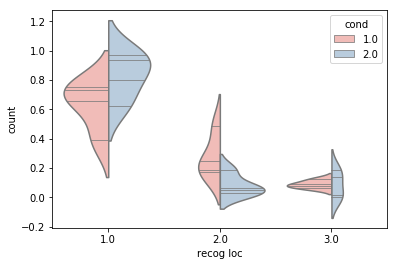

In [21]:
sns.violinplot(x="recog loc", y="count", hue='cond', split=True, inner="stick", data=recog_mean, palette="Pastel1")

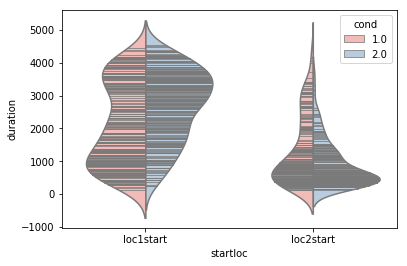

In [22]:
sns.violinplot(x="startloc", y="duration", hue='cond', split=True, inner="stick", 
               data=fix_dur[fix_dur['startloc']!='loc3start'], palette="Pastel1")

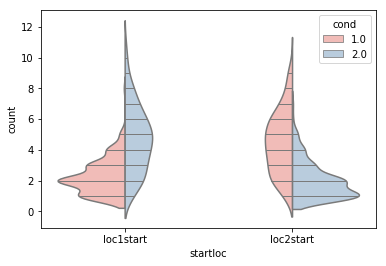

In [22]:
sns.violinplot(x="startloc", y="count", hue='cond', split=True, inner="stick", 
               data=fix_num[fix_num['startloc']!='loc3start'], palette="Pastel1")

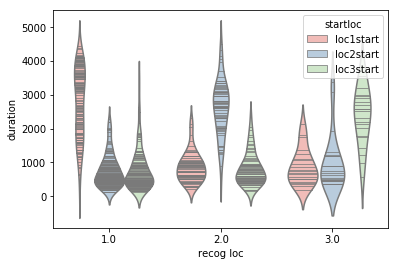

In [23]:
mismatch_fix_dur=fix_dur[fix_dur['cond']==1]
match_fix_dur=fix_dur[fix_dur['cond']==2]
sns.violinplot(x="recog loc", y="duration", hue='startloc', inner="stick", 
               data=mismatch_fix_dur, palette="Pastel1")

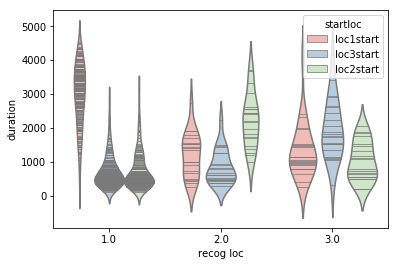

In [24]:
sns.violinplot(x="recog loc", y="duration", hue='startloc', inner="stick", 
               data=match_fix_dur, palette="Pastel1")

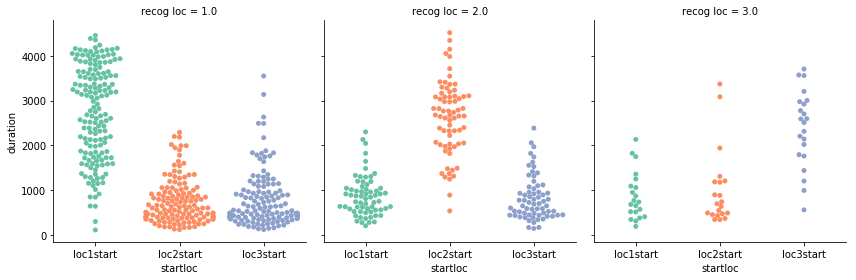

In [25]:
sns.factorplot(x="startloc", y="duration", col="recog loc", 
               data=fix_dur[fix_dur['cond']==1], kind="swarm", palette='Set2');

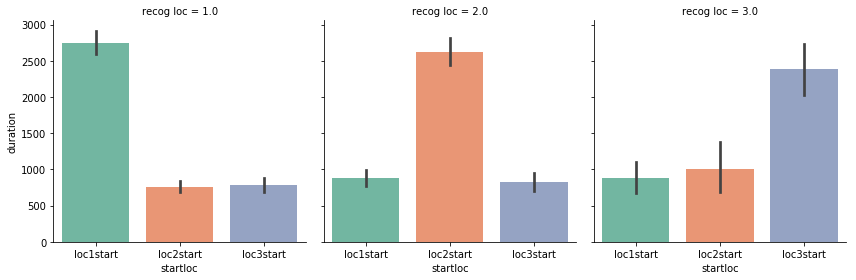

In [26]:
sns.factorplot(x="startloc", y="duration",
               col="recog loc", data=fix_dur[fix_dur['cond']==1], kind="bar", palette='Set2');

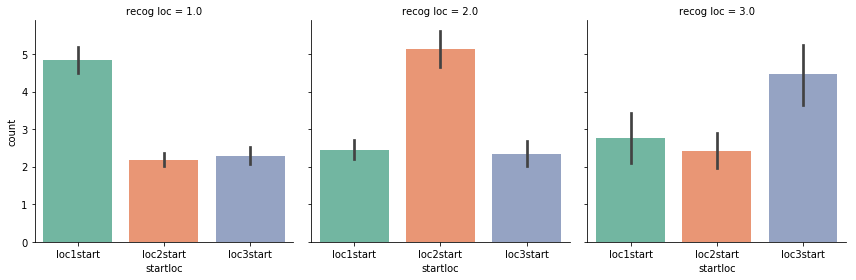

In [27]:
sns.factorplot(x="startloc", y="count",
               col="recog loc", data=fix_num[fix_num['cond']==1], kind="bar", palette='Set2');

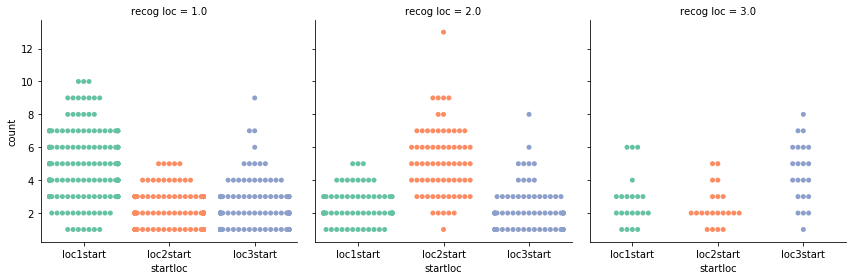

In [28]:
sns.factorplot(x="startloc", y="count",
               col="recog loc", data=fix_num[fix_num['cond']==1], kind="swarm", palette='Set2');

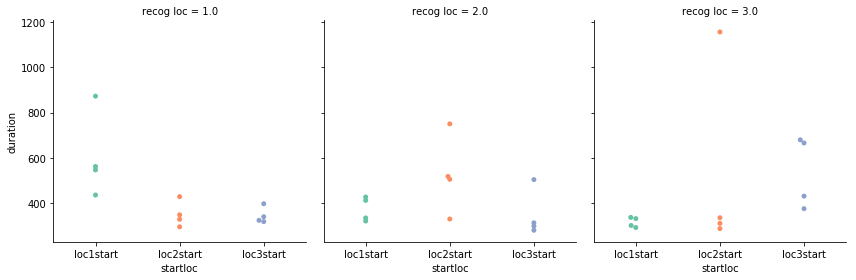

In [29]:
fix_dur_sub=pd.DataFrame(fix.groupby(['sub', 'cond', 'startloc', 'recog loc'])['duration'].mean())
fix_dur_sub.reset_index(inplace=True)
sns.factorplot(x="startloc", y="duration",
               col="recog loc", data=fix_dur_sub[fix_dur_sub['cond']==1], kind="swarm", palette='Set2');